# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [ ]:
!pip install Transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.7 MB/s eta 0:00:00


In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install  pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 45.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=dbbb650e62fc858dbfa97abe376fa76fa3c4b7ea50b0a3a09f8d515ea9236d81
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import os

### 1-3. 한글 글꼴 설정(Colab)

In [ ]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (3,971 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
fm.fontManager.addfont(FONT_PATH)
print(font_name)

#plt.rcParams['font.family']=font_name
plt.rcParams['axes.unicode_minus'] = False
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 전처리한 데이터셋 불러오기

In [ ]:
train = pd.read_csv("/content/drive/train_preprocessed.csv")
test = pd.read_csv("/content/drive/test_preprocessed.csv")
print(train.shape)
display(train.head())

(3706, 2)


,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') 

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

count    3706.000000
mean      200.957366
std       330.558868
min         9.000000
25%        68.000000
50%       118.000000
75%       222.000000
max      6012.000000
Name: data_len, dtype: float64


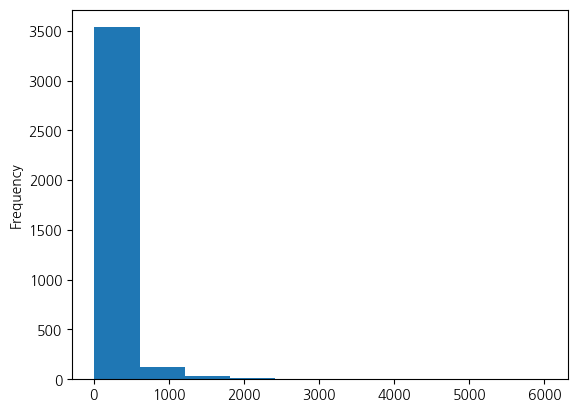

In [ ]:
# data 길이 분포 확인
train['data_len'] = train['text'].apply(lambda x: len(x))
train['data_len'].plot(kind='hist')
print(train['data_len'].describe())

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [ ]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

### 5-2. Train Validation split

In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

train['label'] = train['label'].map(label_dict)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['text'], train['label'], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2964,) (742,) (2964,) (742,)


In [ ]:
print('학습 문장의 평균 길이 :',sum(map(len, train['text']))/len(train['text']))

## 1) bert모델

In [ ]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
tokenized_train_sentences = tokenizer(
    list(X_train),
    return_tensors="pt",
    padding=True,
    truncation=True,
    add_special_tokens=True,
)

In [ ]:
print(tokenized_train_sentences[0])
print(tokenized_train_sentences[0].tokens)
print(tokenized_train_sentences[0].ids)
print(tokenized_train_sentences[0].attention_mask)

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '기', '##억', '##이', '잘', '나', '##질', '않', '##아', '궁', '##금', '##해서', '질', '##문', '##드', '##립', '##니다', '.', '1', '.', '처음', '데', '##이터', '##를', 'x', ',', 'y', '##로', '분', '##할', '##할', '##때', '뒤', '##에', '.', 'values', '##를', '붙', '##이는', '이', '##유', '##가', '뭔', '##가', '##요', '?', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PA

In [ ]:
tokenized_test_sentences = tokenizer(
    list(X_test),
    return_tensors='pt',
    padding=True,
    truncation=True,
    add_special_tokens=True,
)

In [ ]:
print(tokenized_test_sentences[0])
print(tokenized_test_sentences[0].tokens)
print(tokenized_test_sentences[0].ids)
print(tokenized_test_sentences[0].attention_mask)

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '8', '##번', '명', '##령', '##부터', '다시', '실', '##행', '##하라', '하', '##셨', '##는데', 'root', '##에서', '나', '##와', '##야', '하는', '것', '같', '##아', '##서', '시', '##도', '##해', '##보다', '##가', '그', '##냥', '새', '##터', '##미', '##널', '만', '##들어', '##서', '했', '##더', '##니', '이', '##렇게', '[UNK]', '.', '.', '.', '그', '외', '##에도', 'worker', '##랑', 'master', '랑', 'join', '##할', '때', '처음', '한', '번', '##은', '되', '##더', '##니', '그', '다음', '##부터', '##는', '에', '##러', '##가', '[UNK]', '.', '.', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[

In [ ]:
train_label = np.array(y_train) #train을 시리즈 형태가 아니라 array배열로 해주어야 작동함
test_label = np.array(y_test)

In [ ]:
train_label

array([0, 4, 2, ..., 3, 0, 3])

In [ ]:
class SingleSentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = SingleSentDataset(tokenized_train_sentences, train_label)
test_dataset = SingleSentDataset(tokenized_test_sentences, test_label)

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=500,
    save_steps=1000,
    save_total_limit=2
)

In [ ]:
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=5)
model.to(device)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=186, training_loss=1.1930015317855343, metrics={'train_runtime': 256.8167, 'train_samples_per_second': 11.541, 'train_steps_per_second': 0.724, 'total_flos': 779882174263296.0, 'train_loss': 1.1930015317855343, 'epoch': 1.0})

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.evaluate(eval_dataset=test_dataset)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.8717231154441833,
 'eval_accuracy': 0.683288409703504,
 'eval_f1': 0.6590507223936257,
 'eval_precision': 0.6944183430284686,
 'eval_recall': 0.683288409703504,
 'eval_runtime': 22.8591,
 'eval_samples_per_second': 32.46,
 'eval_steps_per_second': 1.05}

## 2) distilbert-base-multilingual-cased모델 이용

In [ ]:
!pip install soynlp

from soynlp.normalizer import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 KB 16.1 MB/s eta 0:00:00


In [ ]:
train = pd.read_csv("/content/drive/train_preprocessed.csv")
test = pd.read_csv("/content/drive/test_preprocessed.csv")
print(train.shape)
display(train.head())

In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

train['label'] = train['label'].map(label_dict)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['text'], train['label'], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
print('학습 문장의 평균 길이 :',sum(map(len, train_df['text']))/len(train_df['text']), max(map(len, train_df['text'])))

학습 문장의 평균 길이 : 190.3256880733945 5491


In [ ]:
train_df

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",4
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,2
2,glob.glob(PATH) 를 사용할 때 질문입니다. PATH에 [ ] 가 포함되...,4
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",4
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,4
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",4
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요? 최고...,0
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가 1. IT 인프라 구...,3
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,1


In [ ]:
from sklearn.model_selection import train_test_split
X = train_df["text"].values
y = train_df["label"].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y) #stratify train, test의 라벨 구성비가 유사하도록 설정

In [ ]:
!pip install -q ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 64.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 53.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 KB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
import ktrain
from transformers import AutoModel, AutoTokenizer, BertTokenizer
from ktrain import text


MODEL_NAME = "distilbert-base-multilingual-cased"
t = text.Transformer(MODEL_NAME, maxlen=300, classes=label.classes_)

/usr/local/lib/python3.9/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


In [ ]:
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

preprocessing train...
language: ko
train sequence lengths:
	mean : 33
	95percentile : 88
	99percentile : 173


Is Multi-Label? False
preprocessing test...
language: ko
test sequence lengths:
	mean : 34
	95percentile : 89
	99percentile : 190


In [ ]:
import matplotlib.pyplot as plt
learner.lr_find(show_plot=True, max_epochs=5)

In [ ]:
from tensorflow import keras
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=10)]

In [ ]:
learner.fit_onecycle(1e-4, 300, callbacks=callbacks)

In [ ]:
learner.validate(class_names=t.get_classes())

In [ ]:
import ktrain
from ktrain import tabular

tst = t.preprocess_test(test, index_col=0))
learner.evaluate(tst, class_names=t.get_classes())

In [ ]:
test3 = np.array(test)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict(test3) 
predictor

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
preds = predictor.predict(test3)
preds

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/random_submission.csv')
sub

In [ ]:
sub['label'] = preds

In [ ]:
label_dict = {
    '코드': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
sub['label'] = sub['label'].map(label_dict)
sub

In [ ]:
sub.to_csv('submission_real.csv', index=False)